In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dftr = pd.read_csv('train.csv')
dfte = pd.read_csv('test.csv')

# Performing EDA

In [3]:
dftr # Checking training dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
dfte # Checking test dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
# below line causes shuffling of indices, to avoid using train_test_split later
#dftr = dftr.reindex(np.random.permutation(dftr.index))

In [6]:
print(dftr.shape);print(dfte.shape) #Checking dataset shape

(159571, 8)
(153164, 2)


In [7]:
print(dftr.columns);print(dfte.columns) # Checking columns in both datasets

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')
Index(['id', 'comment_text'], dtype='object')


In [8]:
for i in dftr.columns: # No of unique values in each column
    print(f'For "{i}" column number of unique values are {dftr[i].nunique()}')

For "id" column number of unique values are 159571
For "comment_text" column number of unique values are 159571
For "malignant" column number of unique values are 2
For "highly_malignant" column number of unique values are 2
For "rude" column number of unique values are 2
For "threat" column number of unique values are 2
For "abuse" column number of unique values are 2
For "loathe" column number of unique values are 2


In [9]:
count =['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for i in count: # No of unique values in each column
    print(f'% of {i} comments are\n{((dftr[i].value_counts())/dftr.shape[0])*100}')
    print('x'*50)

% of malignant comments are
0    90.415552
1     9.584448
Name: malignant, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
% of highly_malignant comments are
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
% of rude comments are
0    94.705178
1     5.294822
Name: rude, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
% of threat comments are
0    99.700447
1     0.299553
Name: threat, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
% of abuse comments are
0    95.063639
1     4.936361
Name: abuse, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
% of loathe comments are
0    99.119514
1     0.880486
Name: loathe, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


As per provided definitions values 0 and 1, denoting if the comment is malignant/yes or not/no etc for all targets.

In [10]:
# Lemetizing column and rejoing it as a string
import nltk
from nltk.tokenize import sent_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Desc):
    return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Desc)]


dftr['lemm_desc'] = dftr.comment_text.apply(lemmatize_text)


dftr['lemm_desc'] = [' '.join(map(str, l)) for l in dftr['lemm_desc']]

dftr

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,lemm_desc
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww! He match this background colour I'm see...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,""" More I can't make any real suggestion on imp..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember..."
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,""":::::And for the second time of asking, when ..."
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,You should be ashamed of yourself That is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,"Spitzer Umm, there no actual article for prost..."
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,And it look like it wa actually you who put on...


In [11]:
label = dftr[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']] # Separating the required labels in dftr
print(label.head()) # printing top 5 rows
label = label.to_numpy() # converting df to numpy array

   malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0


In [12]:
label.shape # Shape of new array

(159571, 6)

In [13]:
# Checking for features with multiple non zero values
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(f'Total rows with non-zero values {ct1}')
print(f'Total rows with multiple non-zero values {ct2}')

Total rows with non-zero values 16225
Total rows with multiple non-zero values 9865


We can see that totally 

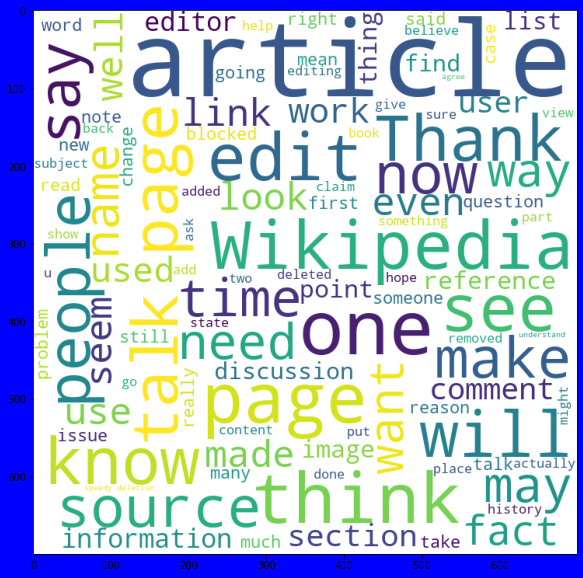

In [14]:
from wordcloud import WordCloud
spam = dftr['comment_text'][dftr['malignant']==0]
spam_cloud = WordCloud(width =700, height = 700, background_color = 'white',max_words = 100).generate(' '.join(spam))
plt.figure(figsize=(10,10), facecolor = 'b')
plt.imshow(spam_cloud)
plt.show()

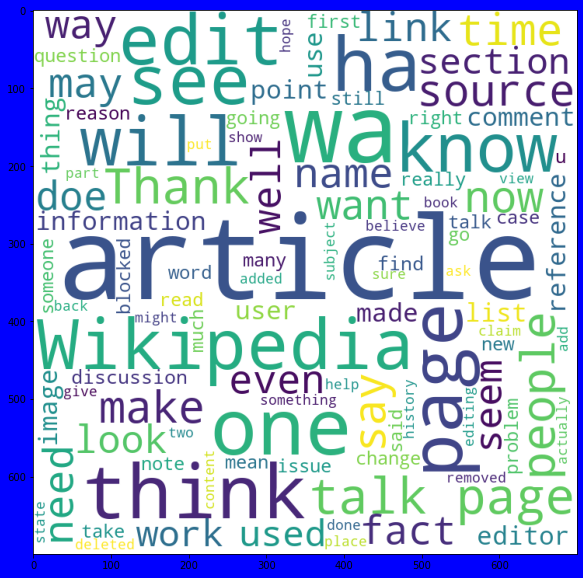

In [15]:
spam = dftr['lemm_desc'][dftr['malignant']==0]
spam_cloud = WordCloud(width =700, height = 700, background_color = 'white',max_words = 100).generate(' '.join(spam))
plt.figure(figsize=(10,10), facecolor = 'b')
plt.imshow(spam_cloud)
plt.show()

Pre-cleaned comments does not indicate towards any objectionable words

In [16]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)


from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

dftr['lemm_desc'] = dftr['lemm_desc'].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'^.+@[^\.]\.[a-z]{z,}$' , " ") # Removing any email symbols
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$' , " ") # Removing any website symbols
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'\u20B9|\$' , " ") # Removing any currency symbols
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'\d+(\.\d+)?' , " ") # Removing any digits symbols
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'[^\w\d\s]' , " ") # Removing any punctuations
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'\s+' , " ") # Removing any whitespaces
dftr['lemm_desc'] = dftr['lemm_desc'].str.replace(r'^\s+|\s+?$' , " ") # Removing any leading & trailing white spaces
dftr

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,lemm_desc
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why edits made username Hardcore M...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He match background colour I m seemingly...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really trying edit war It s just g...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I make real suggestion improvement I won...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir hero Any chance remember page on
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,And second time asking view completely contra...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,You ashamed That horrible thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,Spitzer Umm actual article prostitution ring C...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,And look like wa actually put speedy first ver...


In [17]:
comment = dftr['lemm_desc']
print(comment.head())
comment = comment.to_numpy()

0    Explanation Why edits made username Hardcore M...
1    D aww He match background colour I m seemingly...
2    Hey man I m really trying edit war It s just g...
3     More I make real suggestion improvement I won...
4            You sir hero Any chance remember page on 
Name: lemm_desc, dtype: object


average length of comment: 268.8903


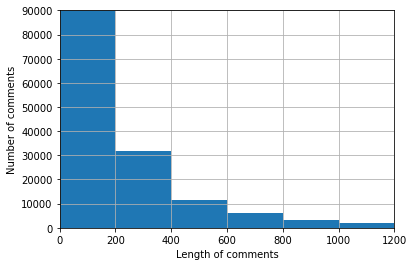

In [18]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.4f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

We can see that maximum comments are with less than 200 words & 80% is less than 400 words

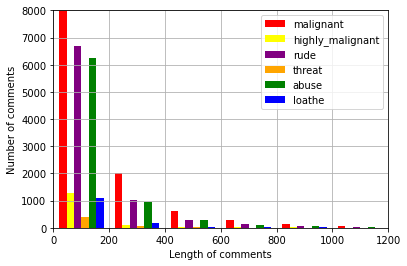

In [19]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
color = ['red','yellow','purple','orange','green','blue']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

It can be seen in all length segments most comments are classified as malignant

In [21]:
labels = np.asarray(labels)
print(len(comments))

131967


In [20]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])
        
        
#import required library
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments)

In [23]:
tf.shape

(131967, 108693)

In [24]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, labels,3)

print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(43989, 108693)
(87978, 108693)
(43989, 6)
(87978, 6)


In [25]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [26]:
# Model building
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD

In [27]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [28]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(43989, 6)


In [29]:
# calculate results
evaluate_score(Y_test,predict)

Hamming_loss : 3.0219676131154003
Accuracy : 88.90177089726977
Log_loss : 1.7660513488786085


In [30]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)
#predictions
predictions = classifier.predict(X_test)
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.1861525987557493
Accuracy : 91.00002273295597
Log_loss : 1.6006160626336872


In [31]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
list=[RandomForestClassifier(),DecisionTreeClassifier(), ExtraTreeClassifier(),KNeighborsClassifier()]
for m in list:
    print(f'From algorithm {m}:')
    classifier = BinaryRelevance(classifier = m, require_dense = [False, True])
    classifier.fit(X_train, Y_train)
    #predictions
    predictions = classifier.predict(X_test)
    #calculate scores
    evaluate_score(Y_test,predictions)

From algorithm RandomForestClassifier():
Hamming_loss : 2.1539475778035415
Accuracy : 90.89317783991453
Log_loss : 1.764340922430704
From algorithm DecisionTreeClassifier():
Hamming_loss : 2.6927186342040055
Accuracy : 88.40391916160858
Log_loss : 1.851440749216222
From algorithm ExtraTreeClassifier():
Hamming_loss : 4.068820235361871
Accuracy : 82.56836936506853
Log_loss : 2.627904384749438
From algorithm KNeighborsClassifier():
Hamming_loss : 3.131843566952344
Accuracy : 89.4291754756871
Log_loss : 1.1270337356470561


In [32]:
from sklearn.linear_model import SGDClassifier
classifier = BinaryRelevance(classifier = SGDClassifier(), require_dense = [False, True])
classifier.fit(X_train, Y_train)
#predictions
predictions = classifier.predict(X_test)
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.068320110330613
Accuracy : 91.03866875809862
Log_loss : 1.5922983673307656


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#define model architecture
model = Sequential()
model.add(Dense(4, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 434776    
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
Total params: 434,806
Trainable params: 434,806
Non-trainable params: 0
_________________________________________________________________


In [34]:
#compile model with all parameters set
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Fit using check pointer
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.myneural.h5py', 
                               verbose=1, save_best_only=True)
model.fit(X_train, Y_train, epochs=10, batch_size=50)

Epoch 1/10
1760/1760 [==============================] - 11s 6ms/step - loss: 0.4756 - accuracy: 0.3082
Epoch 2/10
1760/1760 [==============================] - 11s 6ms/step - loss: 0.4124 - accuracy: 0.4522
Epoch 3/10
1760/1760 [==============================] - 11s 6ms/step - loss: 0.4257 - accuracy: 0.4718
Epoch 4/10
1760/1760 [==============================] - 11s 6ms/step - loss: 0.5575 - accuracy: 0.4819
Epoch 5/10
1760/1760 [==============================] - 13s 7ms/step - loss: 0.6789 - accuracy: 0.2379
Epoch 6/10
1760/1760 [==============================] - 13s 8ms/step - loss: 0.8820 - accuracy: 0.4219
Epoch 7/10
1760/1760 [==============================] - 13s 8ms/step - loss: 1.0151 - accuracy: 0.4402
Epoch 8/10
1760/1760 [==============================] - 15s 8ms/step - loss: 1.0514 - accuracy: 0.4403
Epoch 9/10
1760/1760 [==============================] - 13s 8ms/step - loss: 0.9767 - accuracy: 0.4438
Epoch 10/10
1760/1760 [==============================] - 12s 7ms/step - l

In [35]:
#predictions
predict = model.predict(X_test)
print(predict[0])
#calculate score
loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

[0.43131024 0.06075605 0.14898407 0.06417118 0.24828607 0.04649239]
Log_loss : 0.35107802833353424
Hamming_loss : 4.621988830540968
Accuracy : 85.37588942690219


In [36]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

#define parameters for using in param grid
nodes = [5, 10, 15] # number of nodes in the hidden layer
lrs = [0.001, 0.002, 0.003] # learning rate, default = 0.001
epochs = [10,15,20]
batch_size = 64

In [37]:
def create_model(nodes=10,lr=0.001):
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    opt = optimizers.RMSprop(lr=lr)
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

In [38]:
#start fitting process
param_grid = dict(epochs=epochs,nodes=nodes, lr=lrs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1,refit=True,verbose=2)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Epoch 1/10
2200/2200 [==============================] - 20s 9ms/step - loss: 0.5862 - accuracy: 0.5564
Epoch 2/10
2200/2200 [==============================] - 19s 8ms/step - loss: 1.1491 - accuracy: 0.4121
Epoch 3/10
2200/2200 [==============================] - 22s 10ms/step - loss: 1.3547 - accuracy: 0.3089
Epoch 4/10
2200/2200 [==============================] - 20s 9ms/step - loss: 1.4964 - accuracy: 0.2722
Epoch 5/10
2200/2200 [==============================] - 19s 8ms/step - loss: 1.5645 - accuracy: 0.2679
Epoch 6/10
2200/2200 [==============================] - 17s 8ms/step - loss: 1.6245 - accuracy: 0.2084
Epoch 7/10
2200/2200 [==============================] - 17s 8ms/step - loss: 1.8031 - accuracy: 0.2274
Epoch 8/10
2200/2200 [==============================] - 21s 9ms/step - loss: 2.0704 - accuracy: 0.2607A: 0s - loss: 2
Epoch 9/10
2200/2200 [==============================] - 24s 11ms/step - loss: 2.4177 - accuracy: 0

2200/2200 [==============================] - 31s 14ms/step - loss: 3.1934 - accuracy: 0.5026
Epoch 9/10
2200/2200 [==============================] - 30s 14ms/step - loss: 3.9013 - accuracy: 0.5697
Epoch 10/10
550/550 [==============================] - 1s 1ms/step - loss: 4.8162 - accuracy: 0.9067
[CV] END ......................epochs=10, lr=0.001, nodes=10; total time= 5.1min
Epoch 1/10
2200/2200 [==============================] - 30s 14ms/step - loss: 0.6081 - accuracy: 0.1874
Epoch 2/10
2200/2200 [==============================] - 30s 14ms/step - loss: 0.9377 - accuracy: 0.2656
Epoch 3/10
2200/2200 [==============================] - 30s 14ms/step - loss: 0.9033 - accuracy: 0.3005
Epoch 4/10
2200/2200 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.36 - 30s 14ms/step - loss: 1.0053 - accuracy: 0.3701
Epoch 5/10
2200/2200 [==============================] - 30s 14ms/step - loss: 1.1484 - accuracy: 0.4407
Epoch 6/10
2200/2200 [==============================] - 30s

2200/2200 [==============================] - 53s 24ms/step - loss: 0.6968 - accuracy: 0.3574
Epoch 2/10
2200/2200 [==============================] - 52s 24ms/step - loss: 1.3641 - accuracy: 0.2740
Epoch 3/10
2200/2200 [==============================] - 52s 24ms/step - loss: 1.5594 - accuracy: 0.2777
Epoch 4/10
2200/2200 [==============================] - 53s 24ms/step - loss: 1.6535 - accuracy: 0.2852
Epoch 5/10
2200/2200 [==============================] - 53s 24ms/step - loss: 2.2166 - accuracy: 0.3018
Epoch 6/10
2200/2200 [==============================] - 53s 24ms/step - loss: 3.2513 - accuracy: 0.3994
Epoch 7/10
2200/2200 [==============================] - 53s 24ms/step - loss: 4.1836 - accuracy: 0.3703
Epoch 8/10
2200/2200 [==============================] - 53s 24ms/step - loss: 5.4353 - accuracy: 0.3935
Epoch 9/10
2200/2200 [==============================] - 54s 25ms/step - loss: 6.6160 - accuracy: 0.4582
Epoch 10/10
550/550 [==============================] - 1s 2ms/step - loss: 

2200/2200 [==============================] - 18s 8ms/step - loss: 2.6920 - accuracy: 0.6312
Epoch 6/10
2200/2200 [==============================] - 18s 8ms/step - loss: 4.1267 - accuracy: 0.7293
Epoch 7/10
2200/2200 [==============================] - 18s 8ms/step - loss: 5.8297 - accuracy: 0.7067
Epoch 8/10
2200/2200 [==============================] - 19s 8ms/step - loss: 7.9633 - accuracy: 0.7316
Epoch 9/10
2200/2200 [==============================] - 18s 8ms/step - loss: 10.2987 - accuracy: 0.7288
Epoch 10/10
550/550 [==============================] - 1s 1ms/step - loss: 16.2064 - accuracy: 0.8577
[CV] END .......................epochs=10, lr=0.002, nodes=5; total time= 3.1min
Epoch 1/10
2200/2200 [==============================] - 32s 15ms/step - loss: 0.8521 - accuracy: 0.2896
Epoch 2/10
2200/2200 [==============================] - 32s 15ms/step - loss: 0.8423 - accuracy: 0.3208
Epoch 3/10
2200/2200 [==============================] - 32s 15ms/step - loss: 0.4260 - accuracy: 0.5140


2200/2200 [==============================] - 46s 21ms/step - loss: 1.0107 - accuracy: 0.2629
Epoch 2/10
2200/2200 [==============================] - 46s 21ms/step - loss: 1.4327 - accuracy: 0.2903
Epoch 3/10
2200/2200 [==============================] - 46s 21ms/step - loss: 2.2231 - accuracy: 0.35200s - loss: 2.2216 - accuracy: 
Epoch 4/10
2200/2200 [==============================] - 46s 21ms/step - loss: 3.6063 - accuracy: 0.5193
Epoch 5/10
2200/2200 [==============================] - 46s 21ms/step - loss: 5.4017 - accuracy: 0.4892
Epoch 6/10
2200/2200 [==============================] - 46s 21ms/step - loss: 8.0398 - accuracy: 0.4346
Epoch 7/10
2200/2200 [==============================] - 46s 21ms/step - loss: 10.7967 - accuracy: 0.4131
Epoch 8/10
2200/2200 [==============================] - 46s 21ms/step - loss: 14.4319 - accuracy: 0.3900
Epoch 9/10
2200/2200 [==============================] - 46s 21ms/step - loss: 18.0492 - accuracy: 0.3698
Epoch 10/10
550/550 [=====================

2200/2200 [==============================] - 18s 8ms/step - loss: 0.5476 - accuracy: 0.3958
Epoch 10/10
550/550 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.0373
[CV] END .......................epochs=10, lr=0.003, nodes=5; total time= 3.1min
Epoch 1/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.6603 - accuracy: 0.2652
Epoch 2/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.4267 - accuracy: 0.5537
Epoch 3/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.3710 - accuracy: 0.6624
Epoch 4/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.3777 - accuracy: 0.6006
Epoch 5/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.3992 - accuracy: 0.5330
Epoch 6/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.4305 - accuracy: 0.4761
Epoch 7/10
2200/2200 [==============================] - 18s 8ms/step - loss: 0.4755 - accuracy: 0.4499
Epoch

2200/2200 [==============================] - 29s 13ms/step - loss: 4.1902 - accuracy: 0.3691
Epoch 7/10
2200/2200 [==============================] - 29s 13ms/step - loss: 5.5821 - accuracy: 0.3431
Epoch 8/10
2200/2200 [==============================] - 29s 13ms/step - loss: 7.3707 - accuracy: 0.3235
Epoch 9/10
2200/2200 [==============================] - 29s 13ms/step - loss: 9.5384 - accuracy: 0.3149
Epoch 10/10
550/550 [==============================] - 1s 1ms/step - loss: 14.5463 - accuracy: 0.0226
[CV] END ......................epochs=10, lr=0.003, nodes=10; total time= 4.9min
Epoch 1/10
2200/2200 [==============================] - 38s 17ms/step - loss: 0.9927 - accuracy: 0.2702
Epoch 2/10
2200/2200 [==============================] - 37s 17ms/step - loss: 1.6777 - accuracy: 0.4629
Epoch 3/10
2200/2200 [==============================] - 37s 17ms/step - loss: 3.6657 - accuracy: 0.4307
Epoch 4/10
2200/2200 [==============================] - 37s 17ms/step - loss: 6.4925 - accuracy: 0.3

2200/2200 [==============================] - 16s 7ms/step - loss: 0.3658 - accuracy: 0.7446
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 0.3735 - accuracy: 0.7531
[CV] END .......................epochs=15, lr=0.001, nodes=5; total time= 4.0min
Epoch 1/15
2200/2200 [==============================] - 18s 8ms/step - loss: 0.4853 - accuracy: 0.5959
Epoch 2/15
2200/2200 [==============================] - 18s 8ms/step - loss: 0.7636 - accuracy: 0.4001
Epoch 3/15
2200/2200 [==============================] - 18s 8ms/step - loss: 1.0020 - accuracy: 0.4131
Epoch 4/15
2200/2200 [==============================] - 18s 8ms/step - loss: 1.2695 - accuracy: 0.4011
Epoch 5/15
2200/2200 [==============================] - 18s 8ms/step - loss: 1.5416 - accuracy: 0.3562
Epoch 6/15
2200/2200 [==============================] - 18s 8ms/step - loss: 1.8817 - accuracy: 0.3641
Epoch 7/15
2200/2200 [==============================] - 18s 8ms/step - loss: 2.2860 - accuracy: 0.3577
Epoch

2200/2200 [==============================] - 26s 12ms/step - loss: 9.7079 - accuracy: 0.3381
Epoch 11/15
2200/2200 [==============================] - 27s 12ms/step - loss: 11.6386 - accuracy: 0.3484
Epoch 12/15
2200/2200 [==============================] - 26s 12ms/step - loss: 13.7264 - accuracy: 0.3915
Epoch 13/15
2200/2200 [==============================] - 26s 12ms/step - loss: 15.9209 - accuracy: 0.3959
Epoch 14/15
2200/2200 [==============================] - 26s 12ms/step - loss: 18.8081 - accuracy: 0.4346
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 21.5354 - accuracy: 0.9940
[CV] END ......................epochs=15, lr=0.001, nodes=10; total time= 6.7min
Epoch 1/15
2200/2200 [==============================] - 26s 12ms/step - loss: 0.5847 - accuracy: 0.2182
Epoch 2/15
2200/2200 [==============================] - 25s 11ms/step - loss: 0.9820 - accuracy: 0.3012
Epoch 3/15
2200/2200 [==============================] - 25s 12ms/step - loss: 1.0046 - accur

Epoch 1/15
2200/2200 [==============================] - 38s 17ms/step - loss: 0.6076 - accuracy: 0.4045
Epoch 2/15
2200/2200 [==============================] - 39s 18ms/step - loss: 1.1661 - accuracy: 0.2945
Epoch 3/15
2200/2200 [==============================] - 39s 18ms/step - loss: 1.5939 - accuracy: 0.2495
Epoch 4/15
2200/2200 [==============================] - 39s 18ms/step - loss: 2.2207 - accuracy: 0.2606
Epoch 5/15
2200/2200 [==============================] - 39s 18ms/step - loss: 3.1741 - accuracy: 0.2790
Epoch 6/15
2200/2200 [==============================] - 39s 18ms/step - loss: 4.3701 - accuracy: 0.2949
Epoch 7/15
2200/2200 [==============================] - 39s 18ms/step - loss: 5.6815 - accuracy: 0.2749
Epoch 8/15
2200/2200 [==============================] - 39s 18ms/step - loss: 7.1361 - accuracy: 0.2730
Epoch 9/15
2200/2200 [==============================] - 39s 18ms/step - loss: 8.6467 - accuracy: 0.3040
Epoch 10/15
2200/2200 [==============================] - 39s 18m

2200/2200 [==============================] - 54s 25ms/step - loss: 8.5467 - accuracy: 0.36520s - loss: 8.5016 
Epoch 12/15
2200/2200 [==============================] - 59s 27ms/step - loss: 10.2477 - accuracy: 0.3863
Epoch 13/15
2200/2200 [==============================] - 49s 22ms/step - loss: 11.4295 - accuracy: 0.4446 0s - loss: 11.4314 - accuracy: 0.444
Epoch 14/15
2200/2200 [==============================] - 55s 25ms/step - loss: 13.5429 - accuracy: 0.4988
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 17.9919 - accuracy: 0.0106
[CV] END ......................epochs=15, lr=0.001, nodes=15; total time=12.8min
Epoch 1/15
2200/2200 [==============================] - 22s 10ms/step - loss: 0.9053 - accuracy: 0.2122
Epoch 2/15
2200/2200 [==============================] - 22s 10ms/step - loss: 1.4006 - accuracy: 0.3624
Epoch 3/15
2200/2200 [==============================] - 19s 9ms/step - loss: 0.8021 - accuracy: 0.3352
Epoch 4/15
2200/2200 [==================

2200/2200 [==============================] - 17s 8ms/step - loss: 0.3624 - accuracy: 0.7559
Epoch 6/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.3632 - accuracy: 0.7030
Epoch 7/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.3645 - accuracy: 0.6659
Epoch 8/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.3735 - accuracy: 0.6210
Epoch 9/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.3802 - accuracy: 0.5916
Epoch 10/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.3918 - accuracy: 0.5524
Epoch 11/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.4038 - accuracy: 0.5276
Epoch 12/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.4184 - accuracy: 0.4916
Epoch 13/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.4297 - accuracy: 0.4754
Epoch 14/15
2200/2200 [==============================] - 17s 8ms/step - loss: 0.

550/550 [==============================] - 1s 1ms/step - loss: 0.4662 - accuracy: 0.0494
[CV] END ......................epochs=15, lr=0.002, nodes=10; total time= 7.9min
Epoch 1/15
2200/2200 [==============================] - 32s 15ms/step - loss: 0.7428 - accuracy: 0.2907
Epoch 2/15
2200/2200 [==============================] - 32s 15ms/step - loss: 1.3386 - accuracy: 0.3923
Epoch 3/15
2200/2200 [==============================] - 32s 15ms/step - loss: 2.3049 - accuracy: 0.4716
Epoch 4/15
2200/2200 [==============================] - 32s 15ms/step - loss: 3.8444 - accuracy: 0.5575
Epoch 5/15
2200/2200 [==============================] - 32s 15ms/step - loss: 6.1252 - accuracy: 0.6198
Epoch 6/15
2200/2200 [==============================] - 32s 15ms/step - loss: 9.0691 - accuracy: 0.6369
Epoch 7/15
2200/2200 [==============================] - 31s 14ms/step - loss: 12.6875 - accuracy: 0.5923
Epoch 8/15
2200/2200 [==============================] - 30s 14ms/step - loss: 16.7717 - accuracy: 0.5

2200/2200 [==============================] - 46s 21ms/step - loss: 17.1512 - accuracy: 0.3772
Epoch 10/15
2200/2200 [==============================] - 46s 21ms/step - loss: 21.1755 - accuracy: 0.3593
Epoch 11/15
2200/2200 [==============================] - 46s 21ms/step - loss: 26.9345 - accuracy: 0.3421
Epoch 12/15
2200/2200 [==============================] - 46s 21ms/step - loss: 31.1225 - accuracy: 0.3354
Epoch 13/15
2200/2200 [==============================] - 46s 21ms/step - loss: 37.5131 - accuracy: 0.3246
Epoch 14/15
2200/2200 [==============================] - 46s 21ms/step - loss: 42.9245 - accuracy: 0.3174
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 50.6850 - accuracy: 0.0080
[CV] END ......................epochs=15, lr=0.002, nodes=15; total time=11.7min
Epoch 1/15
2200/2200 [==============================] - 46s 21ms/step - loss: 1.0201 - accuracy: 0.2761
Epoch 2/15
2200/2200 [==============================] - 47s 21ms/step - loss: 0.9023 - ac

2200/2200 [==============================] - 18s 8ms/step - loss: 3.0305 - accuracy: 0.5222
Epoch 5/15
2200/2200 [==============================] - 18s 8ms/step - loss: 4.4636 - accuracy: 0.4928
Epoch 6/15
2200/2200 [==============================] - 18s 8ms/step - loss: 6.0772 - accuracy: 0.4916
Epoch 7/15
2200/2200 [==============================] - 18s 8ms/step - loss: 8.3230 - accuracy: 0.4495
Epoch 8/15
2200/2200 [==============================] - 18s 8ms/step - loss: 10.0307 - accuracy: 0.4275
Epoch 9/15
2200/2200 [==============================] - 18s 8ms/step - loss: 12.3511 - accuracy: 0.4100
Epoch 10/15
2200/2200 [==============================] - 18s 8ms/step - loss: 16.8319 - accuracy: 0.3962
Epoch 11/15
2200/2200 [==============================] - 18s 8ms/step - loss: 19.8325 - accuracy: 0.3750
Epoch 12/15
2200/2200 [==============================] - 18s 8ms/step - loss: 22.6544 - accuracy: 0.3634
Epoch 13/15
2200/2200 [==============================] - 18s 8ms/step - loss

2200/2200 [==============================] - 32s 15ms/step - loss: 23.2045 - accuracy: 0.2821
Epoch 14/15
2200/2200 [==============================] - 32s 15ms/step - loss: 26.6879 - accuracy: 0.2768
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 33.0900 - accuracy: 0.0053
[CV] END ......................epochs=15, lr=0.003, nodes=10; total time= 8.1min
Epoch 1/15
2200/2200 [==============================] - 32s 15ms/step - loss: 0.8264 - accuracy: 0.3341
Epoch 2/15
2200/2200 [==============================] - 32s 15ms/step - loss: 1.3052 - accuracy: 0.4395
Epoch 3/15
2200/2200 [==============================] - 32s 15ms/step - loss: 2.6824 - accuracy: 0.4530
Epoch 4/15
2200/2200 [==============================] - 32s 15ms/step - loss: 4.6329 - accuracy: 0.4343
Epoch 5/15
2200/2200 [==============================] - 32s 15ms/step - loss: 6.8935 - accuracy: 0.4075
Epoch 6/15
2200/2200 [==============================] - 32s 14ms/step - loss: 10.0588 - accuracy:

2200/2200 [==============================] - 46s 21ms/step - loss: 13.5424 - accuracy: 0.3067
Epoch 8/15
2200/2200 [==============================] - 46s 21ms/step - loss: 17.4785 - accuracy: 0.2898
Epoch 9/15
2200/2200 [==============================] - 46s 21ms/step - loss: 22.0107 - accuracy: 0.2867
Epoch 10/15
2200/2200 [==============================] - 46s 21ms/step - loss: 26.7714 - accuracy: 0.2770
Epoch 11/15
2200/2200 [==============================] - 46s 21ms/step - loss: 32.1089 - accuracy: 0.2720
Epoch 12/15
2200/2200 [==============================] - 46s 21ms/step - loss: 37.8414 - accuracy: 0.2683
Epoch 13/15
2200/2200 [==============================] - 46s 21ms/step - loss: 42.3072 - accuracy: 0.2661
Epoch 14/15
2200/2200 [==============================] - 46s 21ms/step - loss: 50.0010 - accuracy: 0.2611
Epoch 15/15
550/550 [==============================] - 1s 1ms/step - loss: 61.2028 - accuracy: 0.0293
[CV] END ......................epochs=15, lr=0.003, nodes=15; to

2200/2200 [==============================] - 18s 8ms/step - loss: 5.5244 - accuracy: 0.3286
Epoch 15/20
2200/2200 [==============================] - 18s 8ms/step - loss: 6.4652 - accuracy: 0.4741
Epoch 16/20
2200/2200 [==============================] - 18s 8ms/step - loss: 7.5094 - accuracy: 0.4696
Epoch 17/20
2200/2200 [==============================] - 18s 8ms/step - loss: 8.1766 - accuracy: 0.4566
Epoch 18/20
2200/2200 [==============================] - 18s 8ms/step - loss: 9.2841 - accuracy: 0.4695
Epoch 19/20
2200/2200 [==============================] - 18s 8ms/step - loss: 10.9227 - accuracy: 0.4399
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 11.2583 - accuracy: 0.3110
[CV] END .......................epochs=20, lr=0.001, nodes=5; total time= 6.1min
Epoch 1/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.4956 - accuracy: 0.1883
Epoch 2/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.7535 - accuracy: 0.411

2200/2200 [==============================] - 32s 15ms/step - loss: 1.2244 - accuracy: 0.2816
Epoch 7/20
2200/2200 [==============================] - 32s 15ms/step - loss: 1.4357 - accuracy: 0.3008
Epoch 8/20
2200/2200 [==============================] - 32s 15ms/step - loss: 1.7913 - accuracy: 0.2838
Epoch 9/20
2200/2200 [==============================] - 32s 15ms/step - loss: 2.0110 - accuracy: 0.3494
Epoch 10/20
2200/2200 [==============================] - 32s 15ms/step - loss: 2.4275 - accuracy: 0.4233
Epoch 11/20
2200/2200 [==============================] - 32s 15ms/step - loss: 2.5814 - accuracy: 0.4478
Epoch 12/20
2200/2200 [==============================] - 32s 15ms/step - loss: 3.2151 - accuracy: 0.4668
Epoch 13/20
2200/2200 [==============================] - 32s 15ms/step - loss: 3.7212 - accuracy: 0.4863
Epoch 14/20
2200/2200 [==============================] - 32s 15ms/step - loss: 4.0037 - accuracy: 0.4860
Epoch 15/20
2200/2200 [==============================] - 32s 15ms/step

2200/2200 [==============================] - 32s 15ms/step - loss: 9.4958 - accuracy: 0.4800
Epoch 17/20
2200/2200 [==============================] - 32s 15ms/step - loss: 10.4147 - accuracy: 0.4960
Epoch 18/20
2200/2200 [==============================] - 32s 15ms/step - loss: 11.3075 - accuracy: 0.4925
Epoch 19/20
2200/2200 [==============================] - 32s 15ms/step - loss: 12.5031 - accuracy: 0.4924
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 13.7442 - accuracy: 0.9939
[CV] END ......................epochs=20, lr=0.001, nodes=10; total time=10.8min
Epoch 1/20
2200/2200 [==============================] - 32s 15ms/step - loss: 0.4615 - accuracy: 0.5884
Epoch 2/20
2200/2200 [==============================] - 32s 15ms/step - loss: 0.7849 - accuracy: 0.2720
Epoch 3/20
2200/2200 [==============================] - 32s 15ms/step - loss: 1.2000 - accuracy: 0.2796
Epoch 4/20
2200/2200 [==============================] - 32s 15ms/step - loss: 1.6552 - accurac

2200/2200 [==============================] - 46s 21ms/step - loss: 4.3640 - accuracy: 0.3578
Epoch 8/20
2200/2200 [==============================] - 46s 21ms/step - loss: 5.4052 - accuracy: 0.4253
Epoch 9/20
2200/2200 [==============================] - 46s 21ms/step - loss: 6.6632 - accuracy: 0.5277
Epoch 10/20
2200/2200 [==============================] - 46s 21ms/step - loss: 8.2042 - accuracy: 0.5810
Epoch 11/20
2200/2200 [==============================] - 46s 21ms/step - loss: 9.9026 - accuracy: 0.6179
Epoch 12/20
2200/2200 [==============================] - 46s 21ms/step - loss: 11.4241 - accuracy: 0.5763
Epoch 13/20
2200/2200 [==============================] - 46s 21ms/step - loss: 13.6228 - accuracy: 0.5804
Epoch 14/20
2200/2200 [==============================] - 46s 21ms/step - loss: 15.6493 - accuracy: 0.5664
Epoch 15/20
2200/2200 [==============================] - 46s 21ms/step - loss: 18.3249 - accuracy: 0.5368
Epoch 16/20
2200/2200 [==============================] - 46s 21ms

550/550 [==============================] - 1s 1ms/step - loss: 26.9904 - accuracy: 0.7944
[CV] END .......................epochs=20, lr=0.002, nodes=5; total time= 6.1min
Epoch 1/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.5922 - accuracy: 0.3521
Epoch 2/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.8047 - accuracy: 0.4130
Epoch 3/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.5162 - accuracy: 0.4315
Epoch 4/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.7695 - accuracy: 0.4071
Epoch 5/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.2037 - accuracy: 0.4297
Epoch 6/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.6867 - accuracy: 0.4555
Epoch 7/20
2200/2200 [==============================] - 18s 8ms/step - loss: 2.4104 - accuracy: 0.4530
Epoch 8/20
2200/2200 [==============================] - 18s 8ms/step - loss: 3.0743 - accuracy: 0.4576
Epoch

2200/2200 [==============================] - 18s 8ms/step - loss: 17.5913 - accuracy: 0.5238
Epoch 13/20
2200/2200 [==============================] - 18s 8ms/step - loss: 22.6133 - accuracy: 0.5175
Epoch 14/20
2200/2200 [==============================] - 18s 8ms/step - loss: 25.6668 - accuracy: 0.5306
Epoch 15/20
2200/2200 [==============================] - 18s 8ms/step - loss: 29.8449 - accuracy: 0.5161
Epoch 16/20
2200/2200 [==============================] - 18s 8ms/step - loss: 32.8103 - accuracy: 0.5118
Epoch 17/20
2200/2200 [==============================] - 18s 8ms/step - loss: 37.6827 - accuracy: 0.5082
Epoch 18/20
2200/2200 [==============================] - 18s 8ms/step - loss: 40.6857 - accuracy: 0.4817
Epoch 19/20
2200/2200 [==============================] - 18s 8ms/step - loss: 46.6626 - accuracy: 0.4810
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 60.6254 - accuracy: 0.4562
[CV] END .......................epochs=20, lr=0.002, nodes=5; total ti

2200/2200 [==============================] - 33s 15ms/step - loss: 1.5935 - accuracy: 0.3324
Epoch 4/20
2200/2200 [==============================] - 33s 15ms/step - loss: 2.5038 - accuracy: 0.4700
Epoch 5/20
2200/2200 [==============================] - 33s 15ms/step - loss: 3.6079 - accuracy: 0.5279
Epoch 6/20
2200/2200 [==============================] - 33s 15ms/step - loss: 4.9303 - accuracy: 0.5111
Epoch 7/20
2200/2200 [==============================] - 33s 15ms/step - loss: 6.7632 - accuracy: 0.4811
Epoch 8/20
2200/2200 [==============================] - 33s 15ms/step - loss: 8.8528 - accuracy: 0.4568
Epoch 9/20
2200/2200 [==============================] - 33s 15ms/step - loss: 11.2493 - accuracy: 0.4418
Epoch 10/20
2200/2200 [==============================] - 33s 15ms/step - loss: 13.6726 - accuracy: 0.4240
Epoch 11/20
2200/2200 [==============================] - 33s 15ms/step - loss: 17.3387 - accuracy: 0.4099
Epoch 12/20
2200/2200 [==============================] - 33s 15ms/step

2200/2200 [==============================] - 45s 20ms/step - loss: 24.9809 - accuracy: 0.2967
Epoch 16/20
2200/2200 [==============================] - 45s 21ms/step - loss: 26.2684 - accuracy: 0.2927
Epoch 17/20
2200/2200 [==============================] - 45s 20ms/step - loss: 29.5943 - accuracy: 0.2860
Epoch 18/20
2200/2200 [==============================] - 44s 20ms/step - loss: 34.9080 - accuracy: 0.2824
Epoch 19/20
2200/2200 [==============================] - 45s 20ms/step - loss: 37.1466 - accuracy: 0.2799
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 41.7665 - accuracy: 0.0032
[CV] END ......................epochs=20, lr=0.002, nodes=15; total time=15.1min
Epoch 1/20
2200/2200 [==============================] - 45s 20ms/step - loss: 1.0067 - accuracy: 0.3042
Epoch 2/20
2200/2200 [==============================] - 45s 20ms/step - loss: 1.3229 - accuracy: 0.3139
Epoch 3/20
2200/2200 [==============================] - 45s 20ms/step - loss: 1.9962 - accu

2200/2200 [==============================] - 18s 8ms/step - loss: 1.3110 - accuracy: 0.4256
Epoch 4/20
2200/2200 [==============================] - 18s 8ms/step - loss: 2.1203 - accuracy: 0.4084
Epoch 5/20
2200/2200 [==============================] - 18s 8ms/step - loss: 3.2360 - accuracy: 0.5118
Epoch 6/20
2200/2200 [==============================] - 18s 8ms/step - loss: 4.5805 - accuracy: 0.5013
Epoch 7/20
2200/2200 [==============================] - 18s 8ms/step - loss: 6.2514 - accuracy: 0.4824
Epoch 8/20
2200/2200 [==============================] - 18s 8ms/step - loss: 8.3682 - accuracy: 0.4574
Epoch 9/20
2200/2200 [==============================] - 18s 8ms/step - loss: 11.0099 - accuracy: 0.4276
Epoch 10/20
2200/2200 [==============================] - 18s 8ms/step - loss: 12.8388 - accuracy: 0.4113
Epoch 11/20
2200/2200 [==============================] - 18s 8ms/step - loss: 15.1105 - accuracy: 0.3975
Epoch 12/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1

2200/2200 [==============================] - 18s 8ms/step - loss: 0.8127 - accuracy: 0.3316
Epoch 15/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.8613 - accuracy: 0.3227
Epoch 16/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.9354 - accuracy: 0.3160
Epoch 17/20
2200/2200 [==============================] - 18s 8ms/step - loss: 0.9863 - accuracy: 0.3060
Epoch 18/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.0495 - accuracy: 0.3049
Epoch 19/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.1135 - accuracy: 0.2994
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 1.5587 - accuracy: 0.0273
[CV] END .......................epochs=20, lr=0.003, nodes=5; total time= 6.1min
Epoch 1/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.1325 - accuracy: 0.4042
Epoch 2/20
2200/2200 [==============================] - 18s 8ms/step - loss: 1.9660 - accuracy: 0.3781


2200/2200 [==============================] - 30s 14ms/step - loss: 4.1997 - accuracy: 0.3981
Epoch 6/20
2200/2200 [==============================] - 30s 14ms/step - loss: 6.1870 - accuracy: 0.3642
Epoch 7/20
2200/2200 [==============================] - 30s 14ms/step - loss: 9.3575 - accuracy: 0.3364
Epoch 8/20
2200/2200 [==============================] - 30s 14ms/step - loss: 12.3405 - accuracy: 0.3242
Epoch 9/20
2200/2200 [==============================] - 30s 14ms/step - loss: 15.6039 - accuracy: 0.3102
Epoch 10/20
2200/2200 [==============================] - 30s 14ms/step - loss: 20.3583 - accuracy: 0.3026
Epoch 11/20
2200/2200 [==============================] - 30s 14ms/step - loss: 24.6784 - accuracy: 0.2915
Epoch 12/20
2200/2200 [==============================] - 30s 14ms/step - loss: 29.4412 - accuracy: 0.2865
Epoch 13/20
2200/2200 [==============================] - 30s 14ms/step - loss: 35.2037 - accuracy: 0.2824
Epoch 14/20
2200/2200 [==============================] - 30s 14ms

2200/2200 [==============================] - 42s 19ms/step - loss: 58.7888 - accuracy: 0.2539
Epoch 18/20
2200/2200 [==============================] - 43s 19ms/step - loss: 67.1435 - accuracy: 0.2564
Epoch 19/20
2200/2200 [==============================] - 42s 19ms/step - loss: 73.3128 - accuracy: 0.2548
Epoch 20/20
550/550 [==============================] - 1s 1ms/step - loss: 80.7687 - accuracy: 0.9941
[CV] END ......................epochs=20, lr=0.003, nodes=15; total time=14.2min
Epoch 1/20
2200/2200 [==============================] - 43s 19ms/step - loss: 1.0530 - accuracy: 0.2352
Epoch 2/20
2200/2200 [==============================] - 43s 19ms/step - loss: 2.0831 - accuracy: 0.4443
Epoch 3/20
2200/2200 [==============================] - 43s 19ms/step - loss: 4.1198 - accuracy: 0.4175
Epoch 4/20
2200/2200 [==============================] - 43s 19ms/step - loss: 7.3058 - accuracy: 0.3770
Epoch 5/20
2200/2200 [==============================] - 43s 19ms/step - loss: 11.1770 - accurac

2200/2200 [==============================] - 57s 26ms/step - loss: 1.7869 - accuracy: 0.39201s - - ETA: 0s - loss: 1.7882 - accu
Epoch 3/20
2200/2200 [==============================] - 57s 26ms/step - loss: 3.9115 - accuracy: 0.4605
Epoch 4/20
2200/2200 [==============================] - 54s 25ms/step - loss: 7.5313 - accuracy: 0.32341s - loss: 7.4934 - accura - ETA: 0s - los
Epoch 5/20
2200/2200 [==============================] - 58s 26ms/step - loss: 11.8797 - accuracy: 0.3331 ETA: 3s - loss: 11.4401 -  - ETA: 2
Epoch 6/20
2200/2200 [==============================] - 58s 26ms/step - loss: 17.4502 - accuracy: 0.3293  - ETA: 0s - loss: 17.4412 - a
Epoch 7/20
2200/2200 [==============================] - 58s 26ms/step - loss: 23.3274 - accuracy: 0.3074 3s - loss: - ETA: 1s - loss: 23.0696 - accuracy: 0.307 - ETA: 1s - loss: 23.0
Epoch 8/20
2200/2200 [==============================] - 47s 21ms/step - loss: 30.1702 - accuracy: 0.2997
Epoch 9/20
2200/2200 [==============================] - 

In [39]:
print(grid_result)
print('Best estimator : {}'.format (grid.best_estimator_))
print('Best score : {}'.format(grid.best_score_))
print('Best params : {}'.format(grid.best_params_))
print(grid.cv_results_)

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CB122B09A0>,
             n_jobs=1,
             param_grid={'epochs': [10, 15, 20], 'lr': [0.001, 0.002, 0.003],
                         'nodes': [5, 10, 15]},
             verbose=2)
Best estimator : <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CB126172B0>
Best score : 0.8698759436607361
Best params : {'epochs': 10, 'lr': 0.001, 'nodes': 10}
{'mean_fit_time': array([216.58328528, 317.70524807, 511.94168773, 184.54423704,
       326.10685902, 442.49012413, 181.31671405, 299.36400914,
       367.90653381, 257.03945928, 438.39666276, 661.04911542,
       277.11719804, 469.47745595, 701.85493879, 273.24510961,
       484.89694958, 692.73708196, 367.10246296, 648.34805145,
       927.80747657, 365.3305934 , 659.1610496 , 908.13842039,
       363.99311962, 600.20490375, 944.74324741]), 'std_fit_time': array([11.3240515 , 21.1554075 , 59.34099685,  0.6

In [40]:
#predictions
predictions = grid.predict(X_test)
#predictions
predict = grid.predict_proba(X_test)
print(predict.shape)
#calculate score
loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
(43989, 6)
Log_loss : 0.36299407867201433
Hamming_loss : 6.251941773322119
Accuracy : 74.39814499079316


In [41]:
# Model training
from sklearn.linear_model import SGDClassifier
brsdg = BinaryRelevance(classifier = SGDClassifier(), require_dense = [False, True])
brsdg.fit(X_train, Y_train)
#predictions
predictions = brsdg.predict(X_test)
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.0527859237536656
Accuracy : 91.0977744436109
Log_loss : 1.6168558923713308


In [42]:
# Saving the model
import joblib
joblib.dump(brsdg,'comment_classifier.obj')
ccp = joblib.load('comment_classifier.obj')

In [49]:
# Testing model performance
import nltk
from nltk.tokenize import sent_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Desc):
    return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Desc)]


dfte['lemm_desc'] = dfte.comment_text.apply(lemmatize_text)


dfte['lemm_desc'] = [' '.join(map(str, l)) for l in dfte['lemm_desc']]

dfte

import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)


from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

dfte['lemm_desc'] = dfte['lemm_desc'].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'^.+@[^\.]\.[a-z]{z,}$' , " ") # Removing any email symbols
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$' , " ") # Removing any website symbols
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'\u20B9|\$' , " ") # Removing any currency symbols
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'\d+(\.\d+)?' , " ") # Removing any digits symbols
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'[^\w\d\s]' , " ") # Removing any punctuations
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'\s+' , " ") # Removing any whitespaces
dfte['lemm_desc'] = dfte['lemm_desc'].str.replace(r'^\s+|\s+?$' , " ") # Removing any leading & trailing white spaces
dfte
comment = dfte['lemm_desc']
print(comment.head())
comment = comment.to_numpy()

comments = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        
        
#import required library
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789
0    Yo bitch Ja Rule succesful ever whats hating s...
1                      From RfC The title fine is IMO 
2                         Sources Zawe Ashton Lapland 
3     If look back source information I updated wa ...
4                      I anonymously edit article all 
Name: lemm_desc, dtype: object


In [63]:
ypred = ccp.predict(tf[ : ,0:108693])

In [64]:
ypred

<130205x6 sparse matrix of type '<class 'numpy.int64'>'
	with 1041 stored elements in Compressed Sparse Column format>

In [66]:
# Saving Predicted values
ypred = pd.DataFrame(ypred)
ypred.to_csv('comments_classifier.csv')

In [67]:
# predicted dataframe
result = pd.concat([dfte,ypred],axis =1)